# SOLUTION PROBLEM SET 8
*Ökonomische Entscheidungen und Märkte IK*<br>
Alexander Ahammer<br>
www.alexander-ahammer.com/teaching<br>
Date: 2020/6/14

## Exercise 1

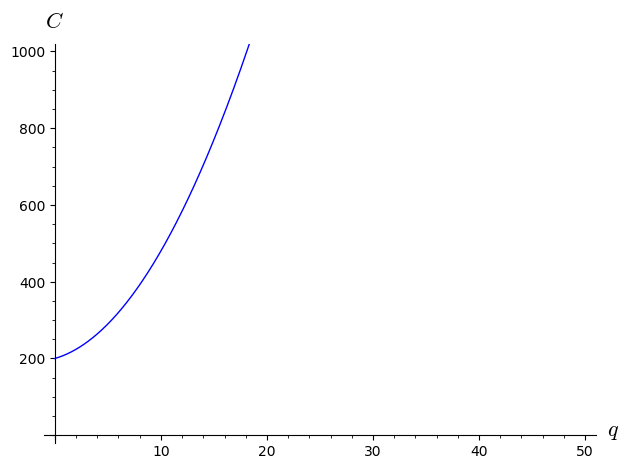

In [1]:
var('q')

# define cost function
C(q) = 2*q^2 + 8*q + 200

# plot cost function
p_C = plot(C(q), (q, 0, 50), ymin=0, ymax=1000, axes_labels=['$q$', '$C$'])
p_C

### (a) Cost components

In [2]:
# fix cost
FC = 200
print("FC =", FC)

# variable cost
VC(q) = 2*q^2 + 8*q
print("VC(q) =", VC(q))

# average fix cost
AFC(q) = FC/q
print("AFC(q) =", AFC(q))

# average variable cost
AVC(q) = VC(q)/q
print("AVC(q) =", AVC(q).full_simplify())

# average cost
AC(q) = C(q)/q
print("AC(q) =", AC(q))

# marginal cost
MC(q) = C(q).diff(q)
print("MC(q) =", MC(q))

FC = 200
VC(q) = 2*q^2 + 8*q
AFC(q) = 200/q
AVC(q) = 2*q + 8
AC(q) = 2*(q^2 + 4*q + 100)/q
MC(q) = 4*q + 8


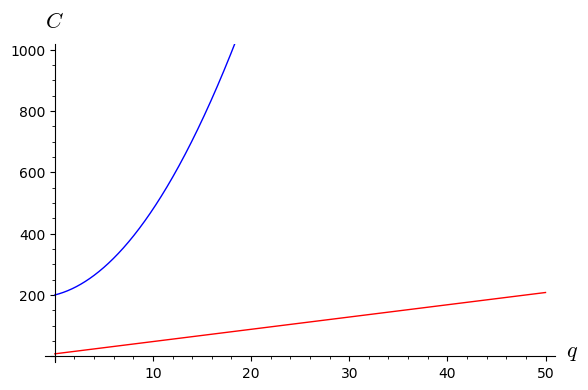

In [3]:
# plot MC function
p_MC = plot(MC(q), (q, 0, 50), ymin=0, ymax=1000, color='red', axes_labels=['$q$', '$C$'])
p_C + p_MC

### (b) AC = MC?

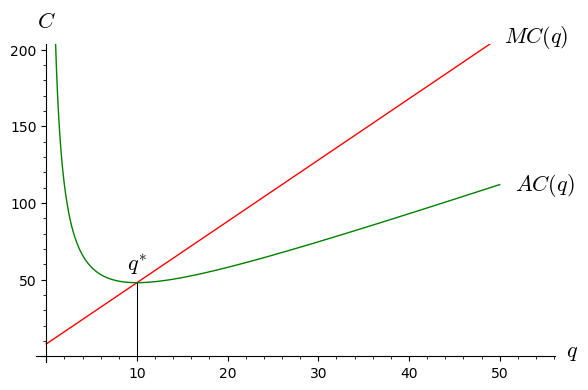

In [4]:
# where are AC = MC?
solve(AC(q)==MC(q), q)[1].rhs()
p_MC = plot(MC(q), (q, 0, 50), ymin=0, ymax=200, color='red', axes_labels=['$q$', '$C$'])
p_AC = plot(AC(q), (q, 0, 50), ymin=0, ymax=200, color='green', axes_labels=['$q$', '$C$'])
p_add = line([(10,0), (10,AC(10))], color='black', thickness=0.75)
p_add += text("$q^{*}$", (10, AC(10)+12), fontsize=16, color='black')
p_add += text("$AC(q)$", (55, AC(50)), fontsize=16, color='black')
p_add += text("$MC(q)$", (54, MC(50)), fontsize=16, color='black')
p_all1 = p_MC + p_AC + p_add
p_all1

This is where profits are 0 for the firm.

### (c) Minimum AC

In [5]:
# should be 10, b/c MC intersect at minimum AC
solve(AC(q).diff(q)==0, q)

[q == -10, q == 10]

## Exercise II
Here it is important to know that maximum output is where $p = MC(q)$. We don't have $MC(q)$ here, but we know that
$$MC(q) = \frac{\partial C(q)}{\partial q} = \frac{\partial FC}{\partial q} + \frac{\partial VC(q)}{\partial q}$$
and since $\partial FC/\partial q=0$, we have
$$MC(q) = \frac{\partial VC(q)}{\partial q}$$
which we actually do have, since $VC(q) = q\cdot AVC(q)$

In [6]:
var('p,q')
AVC(q) = 2 + 4*q
p = 34

# get MC(q)
MC(q) = (AVC(q)*q).diff(q)
print("MC(q) =", MC(q))

# equilibrium
print("q* =", solve(MC(q)==p, q)[0].rhs())

MC(q) = 8*q + 2
q* = 4


## Exercise III

In [7]:
var('P,Q,p,q')

(P, Q, p, q)

### (a) Equilibrium

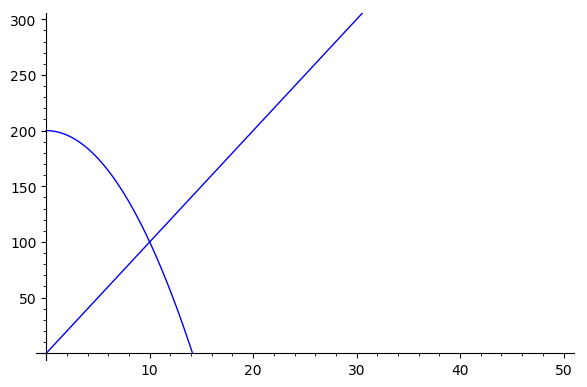

In [8]:
# curves
S(P) = 10*P
D(P) = 200-P^2

# for the graph, we should figure out where the demand curve hits zero
D0 = solve(D(P)==0, P)[1].rhs()

# plot
market = plot(S(P), 0, 50, ymin=0, ymax=300)
market += plot(D(P), 0, D0)
market

In [9]:
# equilibrium
solve(S(P)==D(P), P)

[P == -20, P == 10]

There are two solutions, but one of them is negative. Since we assume prices cannot be negative, $p\in \mathbb{R}^{+}$, only $P^*=10$ is possible.

In [10]:
# equilibrium price and quantity
P_opt = _[1].rhs()
Q_opt = S(P_opt)
print("P* =", P_opt, "; Q^* =", Q_opt)

P* = 10 ; Q^* = 100


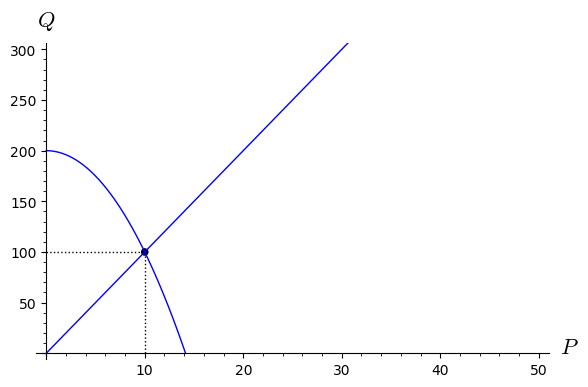

In [11]:
# plot again
eq = plot(Q_opt, 0, 10, color='black', linestyle=':', axes_labels=['$P$', '$Q$'])
eq += line([(10,0), (10,Q_opt)], color='black', linestyle=':')
eq += point((P_opt, Q_opt), size=30, color='black')
eqmarket = eq + market
eqmarket

### (b) SIngle farmer

In [12]:
# cost function
C(q) = 120 + q^2

# profit function
pi(q) = P_opt*q - C(q)

# calculate equilibrium
solve(pi(q).diff(q)==0, q)

[q == 5]

In [13]:
q_opt = _[0].rhs()
print("q* =", q_opt)

pi_opt = pi(q_opt)
print("pi* =", pi_opt)

q* = 5
pi* = -95


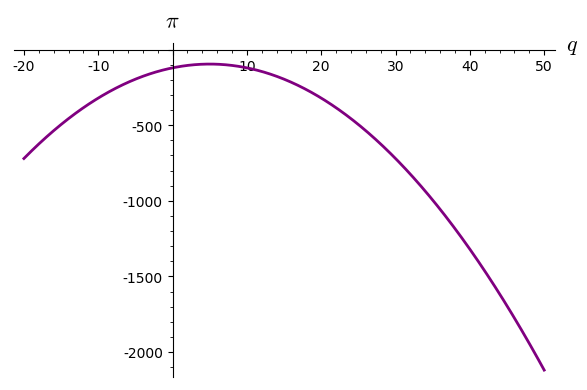

In [14]:
piplot = plot(pi(q), -20, 50, ymax=0, axes_labels=['$q$', '$\\pi$'], color='purple', thickness=2)
piplot

In [15]:
# save graphs
p_C.save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS8_1.pdf')
p_all1.save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS8_2.pdf')
market.save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS8_3.pdf')
eqmarket.save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS8_4.pdf')
piplot.save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS8_5.pdf')

### (c) How many farmers in the market?

In [16]:
N = Q_opt / q_opt
print("N =", N)

N = 20
